In [1]:
# imports
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

import numpy as np
import random
import sympy as sym
import winsound
from scipy.stats import beta
from sklearn.metrics import accuracy_score
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import winsound

In [2]:
duration = 1000  # milliseconds
freq = 440  # Hz

In [3]:
# function to count the number of the infected neighbores of i at t:\n",
def CNbr(G,X,n,T):
    C=np.zeros((T,n))
    for t in range(T):
        C[t]=G[t].dot(X.T[t])
    return C.T

In [4]:
def transition(X,t,G,j,param):
    alpha_=param[0]
    beta_=param[1]
    gama_=param[2]
    c=CNbr(G,X,n,T)[j][t]
    k=X[j,t]-2*X[j,t+1]
    if k==0:
        return 1-alpha_-beta_*c
    elif k==-2:
        return alpha_+beta_*c
    elif k==1:
        return gama_
    else:
        return 1-gama_

In [44]:
# Function to obtain the very initial sample of X, using forwad sampling:\n",
def Forward_Sampling(T,n,G,param):
    alpha_=param[0]
    beta_=param[1]
    gama_=param[2]
    p0=P
    p1=1-P
    x=int(np.round(((1-P)*n),0))
    X=np.zeros((n,T))  
    idx=np.random.choice(range(n), x)
    X[idx,0]=1
    for t in range(T-1):
        for i in range(n):
            c=CNbr(G,X,n,T)[i,t]
            if X[i,t]==0:
                p0=(1-alpha_-beta_*c)
                p1=(alpha_+beta_*c)
            else:
                p0=(gama_)
                p1=(1-gama_)
            if p0+p1==0:
                l=0.5
            else:
                l=p1/(p0+p1)
                #X[i,t+1]=np.random.binomial( 1, l,size=None) 
                if l>.1:
                    X[i,t+1]=1
                else:
                    X[i,t+1]=0
    return X, np.sum(X)   

In [45]:
# function to sample X, using Gibbs Sampling:\n",
def Sample_hidden_state(X,G,Y,param,t):
    pos_probs=np.zeros((n,T))
    alpha_=param[0]
    beta_=param[1]
    gama_=param[2]
    theta_0_0=param[3]
    theta_1_0=param[4] 
    theta_0_1=param[5]
    theta_1_1=param[6] 
    theta_0_2=param[7]
    theta_1_2=param[8]
    theta_0_3=param[9]
    theta_1_3=param[10] 
    theta_0_4=param[11]
    theta_1_4=param[12] 
    theta_0_5=param[13]
    theta_1_5=param[14] 
    for i in range(n):
        if t==0:
            p0,p1=P,1-P
        else:
            p0,p1=1,1
        pow00=int(Y[0,i,t] == 0)   
        pow10=int(Y[0,i,t] == 1)
        pow01=int(Y[1,i,t] == 0)  
        pow11=int(Y[1,i,t] == 1)    
        pow02=int(Y[2,i,t] == 0)      
        pow12=int(Y[2,i,t] == 1)
        pow03=int(Y[3,i,t] == 0)  
        pow13=int(Y[3,i,t] == 1)
        pow04=int(Y[4,i,t] == 0)  
        pow14=int(Y[4,i,t] == 1)    
        pow05=int(Y[5,i,t] == 0)      
        pow15=int(Y[5,i,t] == 1)     
        p0=(1-theta_0_0)**pow00
        p1=(1-theta_1_0)**pow00
        p0=p0*(1-theta_0_1)**pow01
        p1=p1*(1-theta_1_1)**pow01
        p0=p0*(1-theta_0_2)**pow02
        p1=p1*(1-theta_1_2)**pow02
        p0=p0*(1-theta_0_3)**pow03
        p1=p1*(1-theta_1_3)**pow03
        p0=p0*(1-theta_0_4)**pow04
        p1=p1*(1-theta_1_4)**pow04
        p0=p0*(1-theta_0_5)**pow05
        p1=p1*(1-theta_1_5)**pow05
        p0=p0*(theta_0_0)**pow10
        p1=p1*theta_1_0**pow10
        p0=p0*(theta_0_1)**pow11
        p1=p1*theta_1_1**pow11
        p0=p0*(theta_0_2)**pow12
        p1=p1*theta_1_2**pow12
        p0=p0*(theta_0_3)**pow13
        p1=p1*theta_1_3**pow13
        p0=p0*(theta_0_4)**pow14
        p1=p1*theta_1_4**pow14
        p0=p0*(theta_0_5)**pow15
        p1=p1*theta_1_5**pow15
              
       # emission probability when sample is X[i,t]=0:
    
        X[i,t]=0
        p_0=p0
        if (t==0):
            c=CNbr(G,X,n,T)[i][t]
        else:  
            c=CNbr(G,X,n,T)[i][t-1]
              
       # transition probability of i from t-1 to t, when sample is X[i,t]=0:
       
        if t!=0:
            if X[i,t-1]==0:
                p_0=p_0*(1-alpha_-beta_*c)
            else:
                p_0=p_0*gama_
    
       # emission probability when sample is X[i,t]=1:
        X[i,t]=1
        p_1=p1
        if (t==0):
            c=CNbr(G,X,n,T)[i][t]
        else:    
            c=CNbr(G,X,n,T)[i][t-1]
        if t!=0:
        # transition probability of i, when sample is X[i,t]=1:
            if X[i,t-1]==0:
                p_1=p_1*(alpha_+beta_*c)
            else:
                p_1=p_1*(1-gama_)
        # transition probability of i's neighbores, from t to t+1:
        if t!=T-1:        
            X[i,t]=0
            for j in np.where(G[t][i]==1)[0]:
                p_0=p_0*transition(X,t,G,j,param)

            X[i,t]=1
            for j in np.where(G[t][i]==1)[0]:
                p_1=p_1*transition(X,t,G,j,param)
            if p_0+p_1==0:            
                l=0.5
            else:
                l=p_1/(p_0+p_1)
            if (l<0)|(l>1): 
                print(p_0,p_1)
            X[i,t]=np.random.binomial( 1,  l,size=None) 
            #if l>.1:
                #X[i,t]=1
            #else:
                #X[i,t]=0
            pos_probs[i,t]=l
        return X ,pos_probs   

In [7]:
# Gibbs sampling to obtain X, as new sample of posterior distribution:
def Calculate_X(K,T,X,G,Y,param):
    accuracy=[]
    myList =[],
    for k in range(K):
        for t in range(T):
            hidden_states=Sample_hidden_state(X,G,Y,param,t)
            X=hidden_states[0]
            pos_probs=hidden_states[1]
        accuracy.append(np.sum(X))
    myList = list(range(K))
    iteration=np.array(myList)
    Accuracy=np.array(accuracy)

    return X , iteration  ,  Accuracy   ,pos_probs

In [8]:
def Accuracy_(X,X_):
    Xflat = np.hstack(np.hstack(X))
    X_flat = np.hstack(np.hstack(X_))
    result=accuracy_score(Xflat, X_flat,normalize=True)
    return result

In [164]:
# function to define auxiliary variable R_(n,t):
def R_(G,X,params):
    alpha_,beta_,gama_=params[0],params[1],params[2]
    
    R=np.zeros((n,T))+1
    for i in range(n):
        for t in range(T-1):
            infected_neighbore=int(CNbr(G,X,n,T)[i,t])
            pr_a=alpha_/(alpha_+beta_*infected_neighbore)
            pr_b=beta_/(alpha_+beta_*infected_neighbore)
            v=np.random.multinomial(1, [pr_a]+[pr_b]*infected_neighbore)
            if (X[i][t]==0)&(X[i][t+1]==1):
                if v[0]==1:
                    R[i,t]=0
                else: 
                    R[i,t]=2

In [10]:
# function to sample new parameters and update parameters:
def Params(R,G,X,n,T,Y,param):
        
    alpha_=param[0]
    beta_=param[1]
    gama_=param[2]
    theta_0_0=param[3]
    theta_1_0=param[4] 
    theta_0_1=param[5]
    theta_1_1=param[6] 
    theta_0_2=param[7]
    theta_1_2=param[8]
    theta_0_3=param[9]
    theta_1_3=param[10] 
    theta_0_4=param[11]
    theta_1_4=param[12] 
    theta_0_5=param[13]
    TP0=np.sum(np.multiply(X,Y[0]))
    FP0=np.count_nonzero(X-Y[0]==-1)
    TP1=np.sum(np.multiply(X,Y[1]))
    FP1=np.count_nonzero(X-Y[1]==-1)
    TP2=np.sum(np.multiply(X,Y[2]))
    FP2=np.count_nonzero(X-Y[2]==-1)
    TP3=np.sum(np.multiply(X,Y[3]))
    FP3=np.count_nonzero(X-Y[3]==-1)
    TP4=np.sum(np.multiply(X,Y[4]))
    FP4=np.count_nonzero(X-Y[4]==-1)
    TP5=np.sum(np.multiply(X,Y[5]))
    FP5=np.count_nonzero(X-Y[5]==-1)    
    infR=np.array(CNbr(G,X,n,T))
    alpha_=Sample_alpha(a_alpha +  np.count_nonzero(R==0) , b_alpha +np.count_nonzero(X==0)- np.count_nonzero(R==0))
    beta_=Sample_beta(a_beta + np.count_nonzero(R==2) , b_beta +np.sum(np.multiply((1-X),infR))-np.count_nonzero(R==2))
    gama_=Sample_gama(a_gama +(T-1)*n-np.count_nonzero(X[:,:-1]-X[:,1:]-1), b_gama+np.sum(X)-(T-1)*n+np.count_nonzero(X[:,:-1]-X[:,1:]-1))
    theta_0_0=.01#Sample_theta00( a_teta00+FP0,b_teta00+np.count_nonzero(X==0)-FP0)
    theta_1_0=.99#Sample_theta10( a_teta10+TP0,b_teta10+np.count_nonzero(X==1)-TP0)
    theta_0_1=.01#Sample_theta01( a_teta01+FP1,b_teta01+np.count_nonzero(X==0)-FP1)
    theta_1_1=.99#Sample_theta11( a_teta11+TP1,b_teta11+np.count_nonzero(X==1)-TP1)
    theta_0_2=.01#Sample_theta02( a_teta02+FP2,b_teta02+np.count_nonzero(X==0)-FP2)
    theta_1_2=.99#Sample_theta12( a_teta12+TP2,b_teta12+np.count_nonzero(X==1)-TP2)
    theta_0_3=.01#Sample_theta03( a_teta03+FP3,b_teta03+np.count_nonzero(X==0)-FP3)
    theta_1_3=.99#Sample_theta13( a_teta13+TP3,b_teta13+np.count_nonzero(X==1)-TP3)
    theta_0_4=.01#Sample_theta04( a_teta04+FP4,b_teta04+np.count_nonzero(X==0)-FP4)
    theta_1_4=.99#Sample_theta14( a_teta14+TP4,b_teta14+np.count_nonzero(X==1)-TP4)
    theta_0_5=.01#Sample_theta05( a_teta05+FP5,b_teta05+np.count_nonzero(X==0)-FP5)
    theta_1_5=.99#Sample_theta15( a_teta15+TP5,b_teta15+np.count_nonzero(X==1)-TP5)

    R=R_(G,X,params)
    param=np.array([alpha_,beta_,gama_,theta_0_0,theta_1_0,theta_0_1,theta_1_1,theta_0_2,theta_1_2,theta_0_3,theta_1_3,theta_0_4,theta_1_4,theta_0_5,theta_1_5])
    return param,R

# function to sample from beta distribution

In [163]:
def Sample_alpha(a_alpha, b_alpha):
    for i in beta.rvs(a_alpha, b_alpha, size=10000):
        print("al",i,a_alpha,b_alpha)
        if (i>0.001)&(i<0.01):
            alpha_=round(i,3)
            break
    return alpha_    

In [12]:
def Sample_beta(a_beta, b_beta):
    for i in beta.rvs(a_beta, b_beta, size=10000):
        #print("be",a_beta, b_beta)
        if (i>0.0001)&(i<0.051):
            beta_=round(i,4)
            break
    return beta_ 

In [129]:
def Sample_gama(a_gama,b_gama):
    for i in beta.rvs(a_gama, b_gama, size=10000):
        print("g",i,a_gama,b_gama)
        if (i>0.02)&(i<0.7):
            gama_=round(i,3)
            break
    return gama_  

In [14]:
def Sample_theta00(a_teta00, b_teta00):
    for i in beta.rvs(a_teta00, b_teta00, size=10000):
        #print("t00",a_teta00,b_teta00)
        if (i>0.01)&(i<0.3):
            theta_0_0=round(i,3)    
            break
    return theta_0_0 

In [15]:
def Sample_theta10(a_teta10, b_teta10):
    for i in beta.rvs(a_teta10, b_teta10, size=10000):
        #print("t10",i,a_teta10, b_teta10)
        if .993>round(i,3)>0.5:
            theta_1_0=round(i,3)
            break
    return theta_1_0 

In [16]:
def Sample_theta01(a_teta01, b_teta01):
    for i in beta.rvs(a_teta01, b_teta01, size=10000):
        #print("t01",i,a_teta01, b_teta01)
        if (i>0.01)&(i<0.3):
            theta_0_1=round(i,3)
            break
    return theta_0_1

In [17]:
def Sample_theta11(a_teta11, b_teta11):
    for i in beta.rvs(a_teta11, b_teta11, size=10000):
        #print("t11",i,a_teta11, b_teta11)
        if .993>round(i,3)>0.5:
            theta_1_1=round(i,3)
            break
    return theta_1_1

In [18]:
def Sample_theta02(a_teta02, b_teta02):
    for i in beta.rvs(a_teta02, b_teta02, size=10000):
        #print("t02",i,a_teta02, b_teta02)
        if (i>0.01)&(i<0.3):
            theta_0_2=round(i,3)
            break
    return theta_0_2 

In [19]:
def Sample_theta12(a_teta12, b_teta12):
    for i in beta.rvs(a_teta12, b_teta12, size=10000):
        #print("t12",i,a_teta12,b_teta12,i)
        if .993>round(i,3)>0.5:
            theta_1_2=round(i,3)
            break
    return theta_1_2

In [20]:
def Sample_theta03(a_teta03, b_teta03):
    for i in beta.rvs(a_teta03, b_teta03, size=10000):
        #print("t03",i,a_teta03, b_teta03)
        if (i>0.01)&(i<0.3):
            theta_0_3=round(i,3)
            break
    return theta_0_3  

In [21]:
def Sample_theta13(a_teta13, b_teta13):
    for i in beta.rvs(a_teta13, b_teta13, size=10000):
        #print("t13",i,a_teta13, b_teta13)
        if .993>round(i,3)>0.5:
            theta_1_3=round(i,3)
            break
    return theta_1_3

In [22]:
 def Sample_theta04(a_teta04, b_teta04):
    for i in beta.rvs(a_teta04, b_teta04, size=10000):
        #print("t04",i,a_teta04, b_teta04)
        if (i>0.01)&(i<0.3):
            theta_0_4=round(i,3)
            break
    return theta_0_4  

In [23]:
def Sample_theta14(a_teta14, b_teta14):
    for i in beta.rvs(a_teta14, b_teta14, size=10000):
        #print("t14",i,a_teta14, b_teta14)
        if .993>round(i,3)>0.5:
            theta_1_4=round(i,3)
            break
    return theta_1_4

In [24]:
def Sample_theta05(a_teta05, b_teta05):
    for i in beta.rvs(a_teta05, b_teta05, size=10000):
        #print("t05",i,a_teta05, b_teta05)
        if (i>0.01)&(i<0.3):
            theta_0_5=round(i,3)
            break
    return theta_0_5

In [25]:
def Sample_theta15(a_teta15, b_teta15):
    for i in beta.rvs(a_teta15, b_teta15, size=10000):
        #print("t15",a_teta15, b_teta15)
        if .993>round(i,3)>0.5:
            theta_1_5=round(i,3)
            break
    return theta_1_5

In [147]:
# initialize parameters for beta distributions:
a_alpha=1
b_alpha=1
a_beta=1
b_beta=5
a_gama=1
b_gama=5
    
a_teta00=1
b_teta00=5
a_teta10=800
b_teta10=1
a_teta01=1
b_teta01=5
a_teta11=800
b_teta11=1
a_teta02=1
b_teta02=5
a_teta12=800
b_teta12=1
a_teta03=1
b_teta03=5
a_teta13=800
b_teta13=1
a_teta04=1
b_teta04=5
a_teta14=800
b_teta14=1
a_teta05=1
b_teta05=5
a_teta15=800
b_teta15=1
# infection rate
P=1
hyper_params=[a_alpha,b_alpha,a_beta,b_beta,a_gama,b_gama,a_teta00,b_teta00,a_teta10,b_teta10,a_teta01,b_teta01,a_teta11,b_teta11,a_teta02,b_teta02,a_teta12,b_teta12,a_teta03,b_teta03,a_teta13,b_teta13,a_teta04,b_teta04,a_teta14,b_teta14,a_teta05,b_teta05,a_teta15,b_teta15]
   

In [94]:
# function to sample infection and emission parameters(alpha,beta,betaf,gama,teta0,teta1)\n",
def initialize_parameters(hyper_params):
    a_alpha=hyper_params[0]
    b_alpha=hyper_params[1]
    a_beta=hyper_params[2]
    b_beta=hyper_params[3]
    a_gama=hyper_params[4]
    b_gama=hyper_params[5]
    a_teta00=hyper_params[6]
    b_teta00=hyper_params[7]
    a_teta10=hyper_params[8]
    b_teta10=hyper_params[9]
    a_teta01=hyper_params[10]
    b_teta01=hyper_params[11]
    a_teta11=hyper_params[12]
    b_teta11=hyper_params[13]
    a_teta02=hyper_params[14]
    b_teta02=hyper_params[15]
    a_teta12=hyper_params[16]
    b_teta12=hyper_params[17]
    a_teta03=hyper_params[18]
    b_teta03=hyper_params[19]
    a_teta13=hyper_params[20]
    b_teta13=hyper_params[21]
    a_teta04=hyper_params[22]
    b_teta04=hyper_params[23]
    a_teta14=hyper_params[24]
    b_teta14=hyper_params[25]
    a_teta05=hyper_params[26]
    b_teta05=hyper_params[27]
    a_teta15=hyper_params[28]
    b_teta15=hyper_params[29]
    alpha_=Sample_alpha(a_alpha, b_alpha)
    beta_=Sample_beta(a_beta, b_beta)
    gama_=Sample_gama(a_gama,b_gama)
    theta_0_0=Sample_theta00(a_teta00, b_teta00)
    theta_1_0=Sample_theta10(a_teta10, b_teta10)
    theta_0_1=Sample_theta01(a_teta01, b_teta01)
    theta_1_1=Sample_theta11(a_teta11, b_teta11)
    theta_0_2=Sample_theta02(a_teta02, b_teta02)
    theta_1_2=Sample_theta12(a_teta12, b_teta12)
   
    theta_0_3=Sample_theta03(a_teta03, b_teta03)
    theta_1_3=Sample_theta13(a_teta13, b_teta13)
    
    theta_0_4=Sample_theta04(a_teta04, b_teta04)
    theta_1_4=Sample_theta14(a_teta14, b_teta14)
    theta_0_5=Sample_theta05(a_teta05, b_teta05)
    theta_1_5=Sample_theta15(a_teta15, b_teta15)
    params=np.array([alpha_,beta_,gama_,theta_0_0,theta_1_0,theta_0_1,theta_1_1,theta_0_2,theta_1_2,theta_0_3,theta_1_3,theta_0_4,theta_1_4,theta_0_5,theta_1_5])
    return params

In [28]:
# function to add noise to observation vector, in order to test the model performance:\n",
def add_noise(Y,noise_percent):
    Y_noisey=np.copy(Y)
    for turn in range(6):
        index=random.sample(range(0,n*T ), int(n*T*noise_percent))
        for j in index:
            feature=random.randint(0, 5)
            i=int(j/T)
            t=j-i*T
            Y_noisey[feature,i,t]=(1+Y[feature,i,t])*(1-Y[feature,i,t])
    return Y_noisey  

In [86]:
# load data sets for Y,G and generate first J samples of X:
%store -r Y
%store -r G
n,T=G.shape[1],G.shape[0]
U=2
K=2
J=2
params=initialize_parameters(hyper_params)
#params=np.array([0.006 , 0.0168, 0.305 , 0.045 , 0.992 , 0.096 , 0.992 , 0.185 ,
   #    0.992 , 0.192 , 0.991 , 0.251 , 0.99  , 0.289 , 0.992 ])

al 0.024485108178422782 1 7
al 0.04095184413062458 1 7
al 0.08942115151900806 1 7
al 0.16928832004134786 1 7
al 0.24222904964728428 1 7
al 0.22951433232519586 1 7
al 0.1854715259385228 1 7
al 0.34065745783097723 1 7
al 0.45451418107030506 1 7
al 0.09441635342114263 1 7
al 0.06229069122541964 1 7
al 0.05032842448200104 1 7
al 0.13786479581211042 1 7
al 0.0561964588638452 1 7
al 0.06910578512887385 1 7
al 0.00923010769031384 1 7


In [148]:
params=initialize_parameters(hyper_params)
params

al 0.29601539015255973 1 1
al 0.8360471260871102 1 1
al 0.25228090867295594 1 1
al 0.25535439571055024 1 1
al 0.10756282076666848 1 1
al 0.3567836864621646 1 1
al 0.39019218434480274 1 1
al 0.1756594598772479 1 1
al 0.7677725285646022 1 1
al 0.053196671070276313 1 1
al 0.9050232390913338 1 1
al 0.9740290323551761 1 1
al 0.4462952774892861 1 1
al 0.43882266690216876 1 1
al 0.969191599178966 1 1
al 0.43659978391274135 1 1
al 0.6741504018634148 1 1
al 0.5442311994756621 1 1
al 0.6146539342271053 1 1
al 0.811481298874555 1 1
al 0.787247545362245 1 1
al 0.1116486810880327 1 1
al 0.5556184687544219 1 1
al 0.029643711544149364 1 1
al 0.18161168919504098 1 1
al 0.041334696458753664 1 1
al 0.6915651133443688 1 1
al 0.38326827853024803 1 1
al 0.44910904989545997 1 1
al 0.24350881457763082 1 1
al 0.2239467908284902 1 1
al 0.9207109257960686 1 1
al 0.5491642856694696 1 1
al 0.6225863682074289 1 1
al 0.5892385304004576 1 1
al 0.7300859522529124 1 1
al 0.7035734695946082 1 1
al 0.17326341308605286 1

array([0.01  , 0.0324, 0.165 , 0.283 , 0.992 , 0.02  , 0.991 , 0.092 ,
       0.992 , 0.129 , 0.992 , 0.111 , 0.991 , 0.187 , 0.992 ])

In [31]:
Y_noisey=add_noise(Y,.1)
Accuracy_(Y,Y_noisey)

0.9041606541606542

In [32]:
# Main code to run entire Gibbs sampling algorithm U times:
def Gibbs_train(hyper_params,T,n,G,Y,U,K,J):
    a_alpha=hyper_params[0]
    b_alpha=hyper_params[1]
    a_beta=hyper_params[2]
    b_beta=hyper_params[3]
    a_gama=hyper_params[4]
    b_gama=hyper_params[5]
    a_teta00=hyper_params[6]
    b_teta00=hyper_params[7]
    a_teta10=hyper_params[8]
    b_teta10=hyper_params[9]
    a_teta01=hyper_params[10]
    b_teta01=hyper_params[11]
    a_teta11=hyper_params[12]
    b_teta11=hyper_params[13]
    a_teta02=hyper_params[14]
    b_teta02=hyper_params[15]
    a_teta12=hyper_params[16]
    b_teta12=hyper_params[17]
    a_teta03=hyper_params[18]
    b_teta03=hyper_params[19]
    a_teta13=hyper_params[20]
    b_teta13=hyper_params[21]
    a_teta04=hyper_params[22]
    b_teta04=hyper_params[23]
    a_teta14=hyper_params[24]
    b_teta14=hyper_params[25]
    a_teta05=hyper_params[26]
    b_teta05=hyper_params[27]
    a_teta15=hyper_params[28]
    b_teta15=hyper_params[29]
    acc=[]  
    XX=[]
    prob=[]
    for j in range(J):
        params=initialize_parameters(hyper_params)
        print(params)
        FW_X=Forward_Sampling(T,n,G,params)
        X=FW_X[0]
        print(X,FW_X[1])
        print("Forward_Sampling",j)
        print("Start Gibbs Sampling:")
        mylist=[]
        accuracy=[]
        for i in range(U):
            print("************************************************ Iteration",i,"************************************************")
            print("Current Parameters:",params)
            now = datetime.now()
            current_time = now.strftime("%H:%M:%S")
            print("Current Time is :", current_time)
            cal=Calculate_X(K,T,X,G,Y,params)
            X=cal[0]
            pos_probs=cal[3]
            R=R_(G,X,params)
            if i!=U-1:
                prm=Params(R,G,X,n,T,Y,hyper_params)
                params=prm[0]
                R=prm[1]
        
        XX.append(X) 
        prob.append(pos_probs)
        now = datetime.now()
        current_time = now.strftime("%H:%M:%S")
        print("Current Time is :", current_time)
    winsound.Beep(freq, duration) 
    return np.array(XX) ,prob, params   

In [127]:
Train=Gibbs_train(hyper_params,T,n,G,Y,U,K,J)

al 0.03503307469520175 1 1
al 0.9730007281831097 1 1
al 0.8548897550666208 1 1
al 0.2671061483352322 1 1
al 0.4458992501085521 1 1
al 0.49351303583703526 1 1
al 0.583388273616395 1 1
al 0.8494159686649378 1 1
al 0.4271465032783455 1 1
al 0.012014673162660963 1 1
al 0.48693596885600354 1 1
al 0.32019970098401596 1 1
al 0.09481565982959739 1 1
al 0.7811177538325188 1 1
al 0.8664895698200837 1 1
al 0.43421781325876624 1 1
al 0.594356839904988 1 1
al 0.5379739562555488 1 1
al 0.993253794532199 1 1
al 0.030380950833056142 1 1
al 0.4454195506580778 1 1
al 0.478922274955136 1 1
al 0.47209888332973937 1 1
al 0.4420006686924533 1 1
al 0.10922762166647476 1 1
al 0.462929529475503 1 1
al 0.670950530969631 1 1
al 0.526809812548794 1 1
al 0.5642552818834665 1 1
al 0.07699159477240251 1 1
al 0.829583180067983 1 1
al 0.9375826792523256 1 1
al 0.7846988378631905 1 1
al 0.1332689538345951 1 1
al 0.878956515200705 1 1
al 0.09936070808905505 1 1
al 0.34239564295577785 1 1
al 0.5080983343270998 1 1
al 0.7

IndexError: index 66 is out of bounds for axis 2 with size 66

In [51]:
def estimate_Y(X,param):
    theta_0_0=param[3]
    theta_1_0=param[4]
    theta_0_1=param[5]
    theta_1_1=param[6] 
    theta_0_2=param[7]
    theta_1_2=param[8]
    theta_0_3=param[9]
    theta_1_3=param[10] 
    theta_0_4=param[11]
    theta_1_4=param[12]
    theta_0_5=param[13]
    theta_1_5=param[14]
    theta0=[theta_0_0,theta_0_1,theta_0_2,theta_0_3,theta_0_4,theta_0_5]
    theta1=[theta_1_0,theta_1_1,theta_1_2,theta_1_3,theta_1_4,theta_1_5]
    Y_=np.zeros((6,n,T))
    for t in range(T):
        for i in range(n):
            for j in range(6):
                p1=theta0[j]**(1-X[i,t])*(theta1[j])**X[i,t]
                p0=(1-theta0[j])**(1-X[i,t])*(1-theta1[j])**X[i,t]
                l=p1/(p1+p0)
                Y_[j,i,t]=np.random.binomial( 1, l,size=None)
    return Y_

In [62]:
X=Train[0][1]
pos_probs=Train[1][1]
params=Train[2]

In [63]:
Y_estimate=estimate_Y(X,params)

In [64]:
def Gibbs_test(param,T,n,G,Y,K,J):
    a_alpha=hyper_params[0]
    b_alpha=hyper_params[1]
    a_beta=hyper_params[2]
    b_beta=hyper_params[3]
    a_gama=hyper_params[4]
    b_gama=hyper_params[5]
    a_teta00=hyper_params[6]
    b_teta00=hyper_params[7]
    a_teta10=hyper_params[8]
    b_teta10=hyper_params[9]
    a_teta01=hyper_params[10]
    b_teta01=hyper_params[11]
    a_teta11=hyper_params[12]
    b_teta11=hyper_params[13]
    a_teta02=hyper_params[14]
    b_teta02=hyper_params[15]
    a_teta12=hyper_params[16]
    b_teta12=hyper_params[17]
    a_teta03=hyper_params[18]
    b_teta03=hyper_params[19]
    a_teta13=hyper_params[20]
    b_teta13=hyper_params[21]
    a_teta04=hyper_params[22]
    b_teta04=hyper_params[23]
    a_teta14=hyper_params[24]
    b_teta14=hyper_params[25]
    a_teta05=hyper_params[26]
    b_teta05=hyper_params[27]
    a_teta15=hyper_params[28]
    b_teta15=hyper_params[29]    
    acc=[]  
    XX=[]
    prob=[]
    for j in range(J):
        params=initialize_parameters(hyper_params)
        print(params)
        FW_X=Forward_Sampling(T,n,G,params)
        X=FW_X[0]
        print(FW_X[1])
        print("Forward_Sampling",j,"\n",X)
        print("Start Gibbs Sampling:")
        cal=Calculate_X(K,T,X,G,Y,params)
        X=cal[0]
        label="Sample:"+str(j)
        iteration=cal[1]
        Accuracy=cal[2]
        pos_probs=cal[3]
        prob.append(pos_probs)    
        XX.append(X)    
        now = datetime.now()
        current_time = now.strftime("%H:%M:%S")
        print("Current Time is :", current_time)
    winsound.Beep(freq, duration) 
    return np.array(XX),prob
   

In [65]:
Test=Gibbs_test(params,T,n,G,Y_estimate,K,J)

[0.005 0.009 0.349 0.099 0.991 0.201 0.989 0.068 0.991 0.025 0.991 0.068
 0.992 0.203 0.992]
0.0
Forward_Sampling 0 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Start Gibbs Sampling:
Current Time is : 18:06:36
[2.00e-03 5.00e-04 4.30e-01 1.02e-01 9.89e-01 3.10e-02 9.89e-01 1.37e-01
 9.92e-01 3.90e-02 9.91e-01 2.44e-01 9.91e-01 1.42e-01 9.91e-01]
0.0
Forward_Sampling 1 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Start Gibbs Sampling:
Current Time is : 18:06:42
[0.003  0.0508 0.29   0.028  0.992  0.113  0.992  0.03   0.992  0.012
 0.992  0.098  0.991  0.052  0.992 ]
0.0
Forward_Sampling 2 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Start Gibbs Sampling:

In [66]:
pos_probs=Test[1][0]
y_score=np.hstack(pos_probs)
y_score.shape

(4158,)

In [67]:
X_=Test[0][1]
y_test=np.hstack(X)
y_test.shape

(4158,)

In [68]:
fpr, tpr, thresholds = roc_curve(y_test, y_score,pos_label=1)
roc_auc = auc(fpr, tpr)

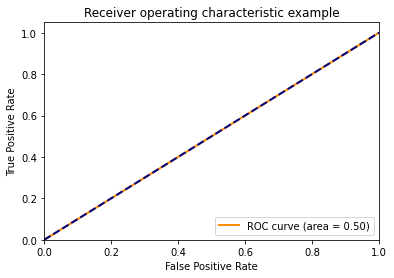

In [69]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [174]:
# Synthetized data:
# Function to generates synthetic dataset
def Synthetic_Data(n,T,y,params):
    Y_=np.zeros((6,n,T))
    alpha_,beta_,gama_,theta_0_0,theta_1_0,theta_0_1,theta_1_1,theta_0_2,theta_1_2,theta_0_3,theta_1_3,theta_0_4,theta_1_4,theta_0_5,theta_1_5=params[0],params[1],params[2],params[3],params[4],params[5],params[6],params[7],params[8],params[9],params[10],params[11],params[12],params[13],params[14]
    teta_0=[theta_0_0,theta_0_1,theta_0_2,theta_0_3,theta_0_4,theta_0_5]
    teta_1=[theta_1_0,theta_1_1,theta_1_2,theta_1_3,theta_1_4,theta_1_5]
    P=.95
    x=int(np.round(((1-P)*n),0))
    X=np.zeros((n,T))
    idx=np.random.choice(range(n), x)
    X[idx,0]=1
    # Random social network
    G=[]
    for j in range(T):
        g=np.identity(n,dtype=int)
        for i in range(n):
            indx=np.random.choice(range(i,n), y)
            for inx in indx:
                g[i,inx]=1  
                g[inx,i]=1
        G.append(g)
    G=np.array(G)
  
    # Synthetize X, using params,G, Family and transition probability:
    for t in range(T-1):
        for i in range(n):
            c=CNbr(G,X,n,T)[i,t]
            if X[i,t]==0:
                p0=1-alpha_-beta_*c
                p1=alpha_+beta_*c
            else:
                p0=gama_
                p1=1-gama_
            if p0+p1==0:
                l=0.5
            else:
                l=p1/(p0+p1)
            #X[i,t+1]=np.random.binomial( 1, l,size=None) 
            if l>.1:
                X[i,t+1]=1
            else:
                X[i,t+1]=0
    # Synthetize Y, using params, G, X, emission probability:
    for t in range(T):
        for i in range(n):
            for j in range(6):
                if X[i,t]==0:
                    teta0=teta_0[j]
                    Y_[j,i,t]=np.random.binomial( 1, teta0,size=None) 
                else:
                    teta1=teta_1[j]
                    Y_[j,i,t]=np.random.binomial( 1, teta1,size=None) 
    return G,Y_,X          

In [175]:
# Generate synthetic data,G ,Y:
n,T,y=100,100,2
synthetic_data=Synthetic_Data(n,T,y,params)
G,Y_true,X_true =synthetic_data[0],synthetic_data[1],synthetic_data[2]

In [176]:
params

array([0.01  , 0.0324, 0.165 , 0.283 , 0.992 , 0.02  , 0.991 , 0.092 ,
       0.992 , 0.129 , 0.992 , 0.111 , 0.991 , 0.187 , 0.992 ])

In [177]:
np.sum(X_true)

4340.0

In [178]:
Train=Gibbs_train(hyper_params,T,n,G,Y_true,U,K,J)

al 0.4887083614206072 1 1
al 0.19387529676775087 1 1
al 0.19082872749400634 1 1
al 0.6436498805137235 1 1
al 0.23793751537232363 1 1
al 0.49449069826937325 1 1
al 0.9516350022707256 1 1
al 0.208138772575807 1 1
al 0.06999140366420442 1 1
al 0.29512650348008934 1 1
al 0.9615770782931607 1 1
al 0.638293641544304 1 1
al 0.08660712456413593 1 1
al 0.12679344591598035 1 1
al 0.2621299312665361 1 1
al 0.44758555698053226 1 1
al 0.9528581389906465 1 1
al 0.6850774940460738 1 1
al 0.9282141241002956 1 1
al 0.4665284007193335 1 1
al 0.24424247863964044 1 1
al 0.8232117536716413 1 1
al 0.7404943309271383 1 1
al 0.32638298230948537 1 1
al 0.11954840785274469 1 1
al 0.8902908785053523 1 1
al 0.019035368748716124 1 1
al 0.42459303568322054 1 1
al 0.3264192892269169 1 1
al 0.5346160640832339 1 1
al 0.532138700724461 1 1
al 0.4472099048626035 1 1
al 0.9574508207489852 1 1
al 0.8317424832690719 1 1
al 0.9166555392382915 1 1
al 0.4065482250859756 1 1
al 0.27041566231644715 1 1
al 0.24093932681190205 1 

al 3.2001648949779976e-06 1 10000
al 0.00011157299436447707 1 10000
al 0.0001486244626726703 1 10000
al 3.641169597346363e-06 1 10000
al 0.0001796781315977458 1 10000
al 0.0001794001873752514 1 10000
al 4.141624488118193e-05 1 10000
al 2.5443702957990713e-05 1 10000
al 3.759667986689048e-05 1 10000
al 0.0002153384726929315 1 10000
al 0.0001745013915507752 1 10000
al 5.099746994459526e-05 1 10000
al 9.722170708732044e-05 1 10000
al 0.00010295821730282658 1 10000
al 0.00020225165435730998 1 10000
al 5.748931522948411e-05 1 10000
al 1.39310981757874e-05 1 10000
al 0.00018666869406131235 1 10000
al 5.4188514137433884e-05 1 10000
al 1.1604941969560954e-05 1 10000
al 3.0492790059337927e-05 1 10000
al 2.1220639956355354e-05 1 10000
al 0.00030178832095693897 1 10000
al 0.0006504784520012474 1 10000
al 2.1021871406710645e-05 1 10000
al 0.00014111563628383482 1 10000
al 0.00025181304208603446 1 10000
al 2.0991083682315773e-05 1 10000
al 2.0451569143159862e-05 1 10000
al 5.3563156225125564e-05 1 

al 3.225935292098972e-05 1 10000
al 0.00014718302495699866 1 10000
al 9.972275163106346e-06 1 10000
al 0.000571979644667723 1 10000
al 0.0004030768834201875 1 10000
al 0.0002892578422740357 1 10000
al 2.5805291406073992e-05 1 10000
al 7.610842993876362e-05 1 10000
al 0.00012941690213418288 1 10000
al 2.7363320936530194e-06 1 10000
al 4.374799071719165e-05 1 10000
al 1.3909060276158697e-05 1 10000
al 9.776748056229978e-05 1 10000
al 6.531710190390353e-06 1 10000
al 5.434497802547275e-06 1 10000
al 9.747134408409608e-05 1 10000
al 5.3325748817892305e-05 1 10000
al 4.163650843311e-05 1 10000
al 4.100134312145682e-05 1 10000
al 0.00012202681275900742 1 10000
al 9.078629938648776e-05 1 10000
al 9.646117170896714e-05 1 10000
al 5.6793666253745435e-05 1 10000
al 5.041424353685565e-05 1 10000
al 9.292807763189835e-05 1 10000
al 0.0002777798014520482 1 10000
al 0.00018538629855236044 1 10000
al 0.00016796656507506137 1 10000
al 6.6535383953775035e-06 1 10000
al 1.8041959553145426e-05 1 10000
al

al 0.00013457036151809512 1 10000
al 0.00034396239042310217 1 10000
al 5.552895865165602e-05 1 10000
al 0.00024893434961151907 1 10000
al 2.994139136710423e-05 1 10000
al 0.00023719794738308428 1 10000
al 0.00010512447851928 1 10000
al 2.433582587267849e-05 1 10000
al 7.53587075628974e-05 1 10000
al 3.7544334626526085e-05 1 10000
al 0.00022059087050178047 1 10000
al 5.391254400785469e-06 1 10000
al 0.0002988002581489805 1 10000
al 2.8242520123932674e-05 1 10000
al 7.252716097797194e-06 1 10000
al 0.00014110539283788094 1 10000
al 0.0001235370009075265 1 10000
al 6.082719199455934e-05 1 10000
al 1.4286929491707438e-05 1 10000
al 0.0003372053381203915 1 10000
al 1.9632149730106444e-05 1 10000
al 0.0001692116847147508 1 10000
al 0.00014480635981109084 1 10000
al 2.110530160713634e-05 1 10000
al 1.4263755797396468e-06 1 10000
al 0.00019006806806393564 1 10000
al 9.59984876180864e-05 1 10000
al 0.0001171922476161844 1 10000
al 8.470050960069026e-05 1 10000
al 0.0004093871725271618 1 10000
a

al 0.00013211612385308723 1 10000
al 2.0611263631988377e-06 1 10000
al 3.6999317724901255e-05 1 10000
al 1.539509247458368e-05 1 10000
al 7.30664777867763e-05 1 10000
al 3.2836400398571146e-05 1 10000
al 4.454051344502162e-05 1 10000
al 0.00011550218082771747 1 10000
al 0.0001691325957991152 1 10000
al 0.0002139373433341324 1 10000
al 3.437023670589343e-05 1 10000
al 2.816813786314835e-05 1 10000
al 0.0002795541455088366 1 10000
al 2.3121354343282033e-05 1 10000
al 5.892006152847381e-06 1 10000
al 2.0088013672644415e-05 1 10000
al 3.275298903826905e-05 1 10000
al 0.0002588608074146347 1 10000
al 5.946610802313144e-05 1 10000
al 1.4899972824804676e-06 1 10000
al 5.876299897164209e-05 1 10000
al 4.357319684905858e-05 1 10000
al 6.0573697687510484e-05 1 10000
al 0.00012118506160210617 1 10000
al 6.305551634895704e-05 1 10000
al 8.172495314823942e-05 1 10000
al 0.0001242555252347749 1 10000
al 0.00012878379966211405 1 10000
al 0.00044829129046895197 1 10000
al 9.139927467510102e-05 1 10000

al 7.325575226350588e-06 1 10000
al 2.4814808203967487e-06 1 10000
al 2.8428335165146535e-05 1 10000
al 0.00012048439380180857 1 10000
al 6.917632691185024e-05 1 10000
al 0.00026444590526100123 1 10000
al 2.759016717560455e-05 1 10000
al 3.3158660819626656e-05 1 10000
al 4.4505880731736004e-05 1 10000
al 2.7489441974596784e-05 1 10000
al 0.00023395739812108365 1 10000
al 9.577233732778448e-05 1 10000
al 6.752891298764995e-05 1 10000
al 1.5389318975124862e-05 1 10000
al 1.4521959663723973e-05 1 10000
al 0.00019551506421972315 1 10000
al 6.078711734271123e-05 1 10000
al 0.00022000109251705762 1 10000
al 3.754511636863416e-05 1 10000
al 0.00036142029766075476 1 10000
al 5.368319039401923e-05 1 10000
al 6.358292878257745e-05 1 10000
al 2.850085640510505e-05 1 10000
al 8.659961583172644e-05 1 10000
al 3.5554236753215535e-05 1 10000
al 2.825221702791446e-05 1 10000
al 0.00015296532874930466 1 10000
al 4.266083587401353e-05 1 10000
al 5.776581830093598e-05 1 10000
al 0.00014844974087240898 1 

al 0.000122405041392363 1 10000
al 5.676040941623909e-05 1 10000
al 4.0287829836573124e-05 1 10000
al 1.1467391372582851e-05 1 10000
al 3.106851163063828e-05 1 10000
al 0.0001303086145699194 1 10000
al 1.6994106156485055e-05 1 10000
al 0.0001217673594940946 1 10000
al 0.00013701477057253314 1 10000
al 0.00019419351172196046 1 10000
al 9.071349462437404e-06 1 10000
al 7.28609292388091e-05 1 10000
al 0.00022492741621826584 1 10000
al 4.450173296173847e-05 1 10000
al 3.2024032852619534e-05 1 10000
al 0.00011770757064218089 1 10000
al 2.6403215572837255e-05 1 10000
al 6.688189068370112e-05 1 10000
al 9.925849809228017e-05 1 10000
al 6.051686333971366e-06 1 10000
al 4.136078972199574e-05 1 10000
al 2.9681276663002508e-05 1 10000
al 3.118234644618612e-05 1 10000
al 0.0001595070610787233 1 10000
al 0.00024413846995477816 1 10000
al 4.842156213273396e-05 1 10000
al 3.7020202815336995e-05 1 10000
al 0.00013617206884075232 1 10000
al 3.693326738573706e-05 1 10000
al 8.312386334672191e-06 1 10000

al 0.00011204521373180182 1 10000
al 4.218389162090765e-05 1 10000
al 7.298675156919393e-05 1 10000
al 0.00012365659004635342 1 10000
al 9.240349765576431e-05 1 10000
al 1.1732008574175516e-05 1 10000
al 0.00011766272295902907 1 10000
al 4.3273500150640884e-05 1 10000
al 2.966488169276292e-05 1 10000
al 5.479083615129962e-05 1 10000
al 7.52218949361628e-06 1 10000
al 7.891865243836052e-05 1 10000
al 0.0001340707281186816 1 10000
al 5.7049243691758954e-05 1 10000
al 1.1425071167617694e-05 1 10000
al 1.5173643177608747e-05 1 10000
al 0.00020432392447871807 1 10000
al 3.866244142711469e-05 1 10000
al 0.00011335172312337279 1 10000
al 0.0001617908053023821 1 10000
al 3.0346522296849244e-05 1 10000
al 0.00022197037376892718 1 10000
al 0.00015834638400803635 1 10000
al 0.00011176266327789855 1 10000
al 0.0003039862826150066 1 10000
al 1.0962093325570893e-05 1 10000
al 0.00012454986292424565 1 10000
al 3.818675907221119e-05 1 10000
al 8.717671584259407e-05 1 10000
al 7.27818779442616e-05 1 10

al 3.072437422240891e-07 1 10000
al 5.990845658167442e-05 1 10000
al 0.00016192489713558517 1 10000
al 0.00018953510457373732 1 10000
al 3.6237945424787284e-06 1 10000
al 0.00010290753994054653 1 10000
al 6.217132750136184e-05 1 10000
al 2.9515642502477374e-05 1 10000
al 5.6803368016201875e-05 1 10000
al 0.00017870750364676468 1 10000
al 8.61978498335892e-06 1 10000
al 8.793599833673043e-07 1 10000
al 7.106014164724309e-05 1 10000
al 0.00010747315575405129 1 10000
al 0.00011981349805355025 1 10000
al 6.144090700893932e-05 1 10000
al 0.00017632806991177449 1 10000
al 1.2402121219457465e-05 1 10000
al 1.3822279760601437e-06 1 10000
al 1.3306159379062693e-05 1 10000
al 0.00011677436784362481 1 10000
al 0.00019503220944486216 1 10000
al 5.3163349824964046e-05 1 10000
al 0.0001319737624478835 1 10000
al 8.224119121687887e-05 1 10000
al 0.00038977404483548706 1 10000
al 8.441788166629775e-05 1 10000
al 2.8531096846316236e-05 1 10000
al 0.0001672389876027708 1 10000
al 9.062178178244607e-05 1

al 8.36477939485036e-05 1 10000
al 4.616445601974372e-05 1 10000
al 6.787461678873829e-06 1 10000
al 2.1629785343607677e-05 1 10000
al 2.28306183421107e-05 1 10000
al 0.00017778246010640586 1 10000
al 0.0001996343607475408 1 10000
al 4.055329242140198e-05 1 10000
al 0.00022138357497420355 1 10000
al 6.185890575027641e-07 1 10000
al 0.00011614755216648469 1 10000
al 0.000115226419536359 1 10000
al 2.6878001764381754e-05 1 10000
al 7.476009484072136e-05 1 10000
al 3.898609556795149e-05 1 10000
al 0.00011501649272432141 1 10000
al 0.00020989988190382294 1 10000
al 5.452051887433658e-05 1 10000
al 2.145133329529476e-05 1 10000
al 0.0002242247576928508 1 10000
al 7.419966213014435e-05 1 10000
al 0.000138494307130346 1 10000
al 8.319243357834764e-05 1 10000
al 0.00016192176180549316 1 10000
al 0.000253266789686434 1 10000
al 0.0002670427340809626 1 10000
al 0.0001806937891070366 1 10000
al 9.83889710562375e-06 1 10000
al 9.350536519489268e-05 1 10000
al 0.00012060200404281806 1 10000
al 6.94

al 0.0004369106148897753 1 10000
al 2.073839016273036e-05 1 10000
al 5.435857355223737e-05 1 10000
al 0.00023802376879837747 1 10000
al 1.3572851662729008e-05 1 10000
al 6.122731125108333e-05 1 10000
al 1.4945402160911213e-05 1 10000
al 4.317512933954231e-05 1 10000
al 0.00011454281104847021 1 10000
al 1.3923364786333839e-05 1 10000
al 9.29316337400766e-06 1 10000
al 8.777600631538999e-05 1 10000
al 0.0001374514825952925 1 10000
al 2.8325633124241873e-05 1 10000
al 2.612954629803483e-05 1 10000
al 0.0003015552919756378 1 10000
al 6.192868904979055e-05 1 10000
al 6.493386770035457e-05 1 10000
al 9.008838148226991e-05 1 10000
al 1.5819809989172403e-06 1 10000
al 6.41818374268392e-05 1 10000
al 9.840225409675594e-05 1 10000
al 2.1419516274666806e-05 1 10000
al 0.00016841779550873346 1 10000
al 9.70567068201562e-05 1 10000
al 1.790725858933738e-05 1 10000
al 7.464601637063082e-05 1 10000
al 0.00013809019854253306 1 10000
al 0.00012832398433059691 1 10000
al 0.00012595459545572448 1 10000
a

al 0.00016162893139577442 1 10000
al 2.799213301076091e-05 1 10000
al 9.323135445968938e-06 1 10000
al 0.0001336712048899162 1 10000
al 0.00013406276665078233 1 10000
al 7.724641988660174e-06 1 10000
al 0.0001559493936088754 1 10000
al 1.556501543946472e-06 1 10000
al 0.00021042778383576096 1 10000
al 3.576323874303216e-05 1 10000
al 0.0001163389673346306 1 10000
al 0.00012751204038971648 1 10000
al 9.752159001354872e-06 1 10000
al 7.64917812610216e-05 1 10000
al 9.469910519449127e-05 1 10000
al 0.00020275826928296684 1 10000
al 6.24106537812999e-06 1 10000
al 0.00010321331078445265 1 10000
al 0.0001745264491858608 1 10000
al 5.7543500388680166e-05 1 10000
al 1.1159045720407179e-05 1 10000
al 1.4072451724704366e-05 1 10000
al 3.7872348635937894e-05 1 10000
al 4.718267814566262e-06 1 10000
al 0.00045061356575960593 1 10000
al 1.2337584525701173e-05 1 10000
al 9.988450545112493e-05 1 10000
al 0.0003329605581056653 1 10000
al 5.211470543154269e-05 1 10000
al 3.8317761083535e-05 1 10000
al

al 9.117183743410908e-05 1 10000
al 7.858752101303064e-07 1 10000
al 0.00011993345664980222 1 10000
al 9.84569952750226e-05 1 10000
al 5.973121067560553e-05 1 10000
al 0.00017832639089728324 1 10000
al 0.00011300145908101227 1 10000
al 3.6157276407351095e-05 1 10000
al 0.0003840711895831216 1 10000
al 1.6896482546590717e-05 1 10000
al 4.2485667469809096e-05 1 10000
al 0.0001548194409634658 1 10000
al 0.00026833701790435145 1 10000
al 1.8300126174152196e-05 1 10000
al 0.00010492505323795247 1 10000
al 0.0002933309541955173 1 10000
al 0.00016064514387109557 1 10000
al 8.7908069442332e-05 1 10000
al 4.389976689635902e-05 1 10000
al 5.544905692226105e-05 1 10000
al 3.958175775989738e-05 1 10000
al 5.634051823747978e-07 1 10000
al 2.737669221853574e-05 1 10000
al 0.00018124287761016696 1 10000
al 0.00022950236348867354 1 10000
al 1.6017608766919385e-06 1 10000
al 6.588563430552761e-05 1 10000
al 0.00024185356257682477 1 10000
al 0.0001157125019491023 1 10000
al 4.4121049143819703e-05 1 1000

al 0.00017037315084474357 1 10000
al 1.5407138145812335e-05 1 10000
al 8.590420154413416e-05 1 10000
al 3.6583037839213125e-05 1 10000
al 0.00014858622297064572 1 10000
al 5.3707431820558036e-05 1 10000
al 7.409219171544676e-05 1 10000
al 1.5873086144843678e-05 1 10000
al 8.917800822449376e-05 1 10000
al 1.5976694598646816e-05 1 10000
al 0.0001571701116919589 1 10000
al 8.140237136775513e-05 1 10000
al 5.681687104614814e-05 1 10000
al 7.122607012833726e-05 1 10000
al 5.631127383577379e-05 1 10000
al 4.80324838895568e-05 1 10000
al 0.00010771187652185165 1 10000
al 0.00011283182593575068 1 10000
al 0.000429774705989088 1 10000
al 3.951272529930308e-05 1 10000
al 5.1972927070452154e-05 1 10000
al 8.461111611823611e-05 1 10000
al 0.00012137651807987326 1 10000
al 0.0001840984008506479 1 10000
al 2.969023242923925e-05 1 10000
al 6.116470796417624e-05 1 10000
al 4.6294854775520936e-06 1 10000
al 0.00014345931500623745 1 10000
al 6.012425292260205e-05 1 10000
al 3.162245564067853e-05 1 10000

al 5.2044097535833724e-05 1 10000
al 0.0002812563260504469 1 10000
al 3.2697903195699575e-05 1 10000
al 0.000450444865139304 1 10000
al 6.652407283516806e-05 1 10000
al 2.481250078482328e-05 1 10000
al 1.2514762658142301e-05 1 10000
al 0.00015108214749142164 1 10000
al 0.00010475237719349306 1 10000
al 4.1726404423954964e-05 1 10000
al 1.8340083629896022e-05 1 10000
al 6.0486389811430507e-05 1 10000
al 1.0591108325939548e-05 1 10000
al 7.843482101098976e-05 1 10000
al 0.0001573796011372024 1 10000
al 6.040070422682383e-05 1 10000
al 0.00021821361059305315 1 10000
al 3.8574043264039534e-05 1 10000
al 5.7080758364726033e-05 1 10000
al 0.00020346145508574594 1 10000
al 1.6362895383427724e-05 1 10000
al 0.00018930680628313542 1 10000
al 0.0001330737861284225 1 10000
al 9.538900373393065e-06 1 10000
al 7.232651091654808e-05 1 10000
al 0.00018067359768636303 1 10000
al 0.00019126853752624771 1 10000
al 6.796165859302762e-05 1 10000
al 2.1768819485054826e-06 1 10000
al 0.0002406317082129812 1

al 0.00019928534308571544 1 10000
al 2.0991484721442024e-05 1 10000
al 0.0002695476092247855 1 10000
al 4.221384086953023e-06 1 10000
al 7.069643675351167e-05 1 10000
al 0.00010882312272866105 1 10000
al 2.1060908472404e-05 1 10000
al 2.596642144500688e-05 1 10000
al 1.7894166177233437e-05 1 10000
al 0.00010274020123061893 1 10000
al 4.3449021244115954e-05 1 10000
al 0.00010871012114734764 1 10000
al 0.0001333472689472775 1 10000
al 0.00036225933383018407 1 10000
al 1.5888572125694952e-05 1 10000
al 1.885068680987786e-05 1 10000
al 4.683017948166164e-05 1 10000
al 0.00011973627993953013 1 10000
al 8.177704089535259e-05 1 10000
al 4.626100364258974e-05 1 10000
al 0.00012137224900785388 1 10000
al 1.831901972517378e-05 1 10000
al 3.6498612651640232e-06 1 10000
al 5.3150165209480324e-05 1 10000
al 0.00010153570628525935 1 10000
al 1.0333311351024398e-06 1 10000
al 0.00017818111510820616 1 10000
al 0.0001575846113534911 1 10000
al 6.0959337112298726e-05 1 10000
al 0.00010157514569218907 1 

al 6.803441706042318e-05 1 10000
al 0.00014755119925963816 1 10000
al 5.245773002084869e-05 1 10000
al 4.7125371102817875e-05 1 10000
al 0.00011601067243666529 1 10000
al 2.97925382887973e-06 1 10000
al 4.994217935748617e-05 1 10000
al 0.0001330335306669549 1 10000
al 1.4004160591427702e-05 1 10000
al 2.5017572271866865e-05 1 10000
al 0.00022907429837961288 1 10000
al 3.084857933048655e-05 1 10000
al 2.1261991760691893e-05 1 10000
al 2.4035377786872524e-05 1 10000
al 0.0001671567833457185 1 10000
al 6.887191742895343e-05 1 10000
al 1.5443116211496743e-05 1 10000
al 6.220623754413098e-06 1 10000
al 0.00011704475837087394 1 10000
al 3.804292987928491e-05 1 10000
al 4.7269275516626784e-05 1 10000
al 0.00013234231715998355 1 10000
al 7.146533940013002e-05 1 10000
al 3.060032062954905e-05 1 10000
al 2.5656886150560523e-05 1 10000
al 5.513678251118257e-05 1 10000
al 3.053636800663962e-05 1 10000
al 0.00019919999630809283 1 10000
al 8.781175886326165e-06 1 10000
al 1.2095751979178821e-05 1 10

al 0.00016261441449856763 1 10000
al 0.000102033872545214 1 10000
al 7.734100719382308e-05 1 10000
al 9.545028841661706e-05 1 10000
al 9.372967491102682e-05 1 10000
al 1.595587544951949e-05 1 10000
al 0.0001663137988254476 1 10000
al 0.00014850593619930355 1 10000
al 1.67568697114899e-05 1 10000
al 0.00011606847852360562 1 10000
al 0.00015655528592997445 1 10000
al 0.0004973284064188881 1 10000
al 0.00020542582174518396 1 10000
al 0.0002036338662098397 1 10000
al 8.958739922538529e-05 1 10000
al 0.00018304532349202606 1 10000
al 0.0001708447797042866 1 10000
al 0.00010502861591585213 1 10000
al 5.523969041786161e-05 1 10000
al 0.0001011088009070442 1 10000
al 8.252040487477215e-05 1 10000
al 3.3848168379624715e-05 1 10000
al 0.00013327717500154112 1 10000
al 6.309833507818055e-05 1 10000
al 5.149077091247643e-08 1 10000
al 0.00010356496415188462 1 10000
al 0.0001419072540947173 1 10000
al 8.936976755878594e-05 1 10000
al 0.0001326865911316187 1 10000
al 1.7763185889572187e-05 1 10000
a

al 1.8619354655252288e-05 1 10000
al 7.559233441093705e-06 1 10000
al 0.00011726296057044787 1 10000
al 0.0002098273500857735 1 10000
al 9.621715005327398e-05 1 10000
al 0.00024981026294946087 1 10000
al 0.00010832533933913947 1 10000
al 0.0002720376633594668 1 10000
al 2.1223773153726076e-05 1 10000
al 0.00018931629269704016 1 10000
al 5.487154591535603e-05 1 10000
al 0.00012189525185678536 1 10000
al 6.32933275512631e-05 1 10000
al 0.0001211051879651455 1 10000
al 4.8079606296377664e-05 1 10000
al 1.2540095241801877e-05 1 10000
al 6.12416596721115e-05 1 10000
al 0.0001492731639696947 1 10000
al 0.00010829456668745776 1 10000
al 5.958228551285929e-05 1 10000
al 1.3460856898135627e-05 1 10000
al 8.31304449939981e-05 1 10000
al 0.00037197166396765177 1 10000
al 1.6297746423149943e-05 1 10000
al 4.895828699272474e-05 1 10000
al 0.0001505373345723185 1 10000
al 0.00010067822087247111 1 10000
al 0.00028048211554279465 1 10000
al 0.00033143027166942287 1 10000
al 0.0001809491405163138 1 100

al 3.566125698671439e-05 1 10000
al 0.00020428322913151908 1 10000
al 4.571535028450793e-05 1 10000
al 9.36380648888521e-05 1 10000
al 0.00027109681976019654 1 10000
al 0.00012415930972420704 1 10000
al 0.00021902856260657268 1 10000
al 0.00011480178366705962 1 10000
al 0.0002136556484629579 1 10000
al 0.00018337066511459234 1 10000
al 0.00010084863658140676 1 10000
al 0.00016537403275809832 1 10000
al 7.306448940504258e-05 1 10000
al 0.00016358455161799343 1 10000
al 1.0643901509690834e-06 1 10000
al 1.6155033896857445e-05 1 10000
al 4.717772694591158e-05 1 10000
al 0.00013539771024901384 1 10000
al 0.00019376533673373206 1 10000
al 2.3068256063451957e-05 1 10000
al 8.414952844447664e-06 1 10000
al 1.3223611939424765e-05 1 10000
al 0.00021254653284749346 1 10000
al 5.1101110967431754e-05 1 10000
al 5.273134367222e-05 1 10000
al 2.4436654374386367e-05 1 10000
al 2.839158575008849e-05 1 10000
al 0.00015701383072324468 1 10000
al 3.1426807312485824e-05 1 10000
al 9.532574065284302e-05 1 

al 7.159348688255973e-05 1 10000
al 0.00011095521795767048 1 10000
al 2.2113096792047108e-05 1 10000
al 5.5744208399227014e-05 1 10000
al 0.00017693862978095676 1 10000
al 9.234737781839713e-05 1 10000
al 8.922770219270867e-05 1 10000
al 0.0001289179174796674 1 10000
al 0.00037100072813266535 1 10000
al 0.00013933552016101485 1 10000
al 0.00016227965345998326 1 10000
al 0.00021953476854857568 1 10000
al 2.6250757353051733e-05 1 10000
al 5.4677302620396066e-05 1 10000
al 2.0553863678179116e-06 1 10000
al 8.787348640736266e-06 1 10000
al 0.00015744537826279197 1 10000
al 0.00013511278158387995 1 10000
al 9.669603255592685e-05 1 10000
al 0.00030401877116170993 1 10000
al 3.9546121992773e-05 1 10000
al 2.795850915952647e-05 1 10000
al 0.00013125462471394296 1 10000
al 8.504064471203476e-05 1 10000
al 0.0001868363531179986 1 10000
al 0.00012924761929651013 1 10000
al 0.00011503793801576499 1 10000
al 9.683849013936255e-05 1 10000
al 9.005026430561549e-05 1 10000
al 6.130078149651224e-05 1 1

al 0.00015662140580887524 1 10000
al 2.059825362216966e-05 1 10000
al 2.87789556443455e-06 1 10000
al 0.00011015812848983247 1 10000
al 0.00013651572039642226 1 10000
al 8.444376879040953e-05 1 10000
al 3.273052752093662e-05 1 10000
al 6.869181554213324e-05 1 10000
al 9.599517536848092e-05 1 10000
al 0.0004658043258050443 1 10000
al 6.897536376580685e-05 1 10000
al 4.561165484622873e-05 1 10000
al 2.1858622279280652e-05 1 10000
al 6.67570471587708e-05 1 10000
al 0.00011243203476604487 1 10000
al 0.00016817953402986427 1 10000
al 0.00018440445683372384 1 10000
al 0.00016308212798355355 1 10000
al 0.00014694887527847957 1 10000
al 1.8265170004952507e-05 1 10000
al 4.864343157773883e-05 1 10000
al 3.258180753802263e-05 1 10000
al 0.00019650894188793478 1 10000
al 2.5904436666367237e-05 1 10000
al 0.0001460478426584053 1 10000
al 7.435713966449089e-05 1 10000
al 2.9183709121964363e-05 1 10000
al 1.929176739020059e-06 1 10000
al 3.364342987366099e-05 1 10000
al 9.197328381060033e-05 1 10000

al 2.588131335696137e-05 1 10000
al 0.00015650567372801547 1 10000
al 3.798061643832953e-05 1 10000
al 2.149071793282139e-05 1 10000
al 0.0001417619758131298 1 10000
al 0.0004917639480330163 1 10000
al 0.00014101680747442632 1 10000
al 0.0005476994743351539 1 10000
al 0.0001449613428468171 1 10000
al 3.819757166844943e-05 1 10000
al 0.00023330673066328166 1 10000
al 1.1296804383272008e-05 1 10000
al 3.611271023874084e-05 1 10000
al 0.00010471425644976755 1 10000
al 0.00020983621365352266 1 10000
al 0.000306089020819666 1 10000
al 0.00017078504831313841 1 10000
al 0.0001238758555798538 1 10000
al 4.741066504969122e-05 1 10000
al 7.63952702442672e-06 1 10000
al 0.00013113761532480484 1 10000
al 0.0003176284431804876 1 10000
al 0.00012661919417532793 1 10000
al 0.0001965836965222295 1 10000
al 4.937115142288117e-05 1 10000
al 0.0002661493864687378 1 10000
al 5.5267018116526764e-05 1 10000
al 0.00013840101108196886 1 10000
al 1.872076095072837e-05 1 10000
al 0.00021650319598584943 1 10000


al 0.0006064144903745068 1 10000
al 0.0001340988286136621 1 10000
al 0.00018264209370314263 1 10000
al 6.307286032794558e-05 1 10000
al 0.0003760928277755289 1 10000
al 6.202114525174413e-05 1 10000
al 0.00010619000734771837 1 10000
al 0.00012413493660245027 1 10000
al 0.00017961717430209134 1 10000
al 0.000607275605190489 1 10000
al 7.311604700926381e-05 1 10000
al 0.0001911693748322152 1 10000
al 0.00034703752948772246 1 10000
al 0.00021555470016562856 1 10000
al 1.5320831875849515e-05 1 10000
al 6.854499911215137e-05 1 10000
al 0.0002378218110937251 1 10000
al 0.00034158408264298574 1 10000
al 9.111895950647794e-06 1 10000
al 4.4843902747904605e-05 1 10000
al 8.428754539316934e-06 1 10000
al 0.00022702873814730163 1 10000
al 2.5372803795174077e-05 1 10000
al 1.1901361971127351e-05 1 10000
al 3.633572747759105e-05 1 10000
al 7.480854964582059e-05 1 10000
al 0.0002555204524603633 1 10000
al 3.7184227043231955e-05 1 10000
al 2.0066072273179568e-05 1 10000
al 6.82712490330943e-05 1 1000

al 1.2801585133923161e-05 1 10000
al 0.0002560184899212544 1 10000
al 1.9476728035333044e-05 1 10000
al 0.00012798893573912062 1 10000
al 2.1893939545984906e-05 1 10000
al 7.034707839815367e-05 1 10000
al 6.970887874758813e-05 1 10000
al 1.7559794796916093e-05 1 10000
al 0.00012191378241366748 1 10000
al 4.3815025270143515e-05 1 10000
al 0.00016880486591287213 1 10000
al 0.00020178471250733936 1 10000
al 1.635972959012249e-05 1 10000
al 7.951346615502091e-05 1 10000
al 1.330015384076986e-06 1 10000
al 0.0004983877063296703 1 10000
al 0.00011048187869625472 1 10000
al 6.786288354852462e-05 1 10000
al 7.320184722769568e-05 1 10000
al 1.6786270139553197e-06 1 10000
al 0.00015018364515136752 1 10000
al 2.562401160746058e-05 1 10000
al 4.8869221109828576e-05 1 10000
al 0.00014418637463135126 1 10000
al 1.6098328321586207e-05 1 10000
al 0.00023628398466666768 1 10000
al 6.007721142108873e-05 1 10000
al 0.00022824536846645144 1 10000
al 6.286998392282246e-05 1 10000
al 4.4333488741566184e-05 

UnboundLocalError: local variable 'alpha_' referenced before assignment

In [ ]:
Test=Gibbs_test(params,T,n,G,Y_estimate,K,J)

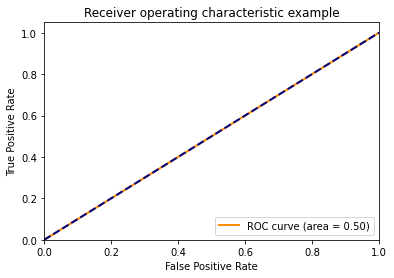

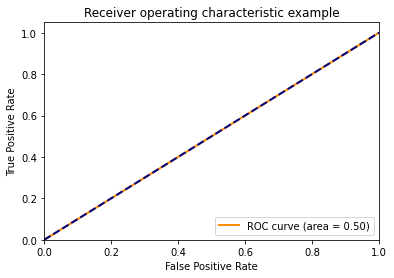

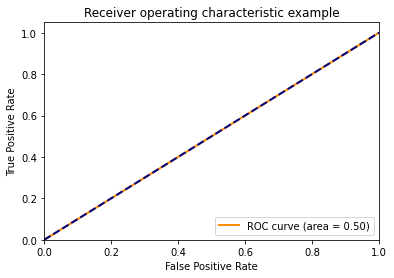

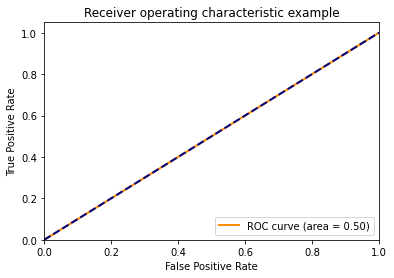

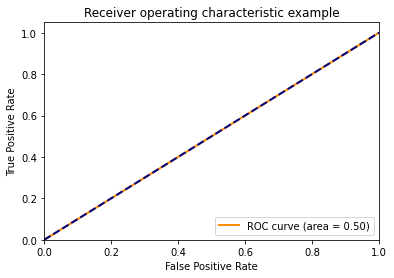

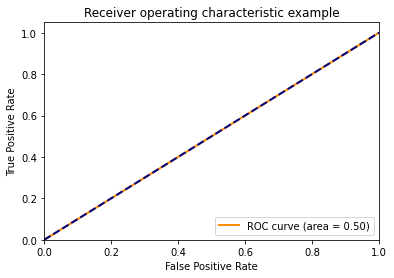

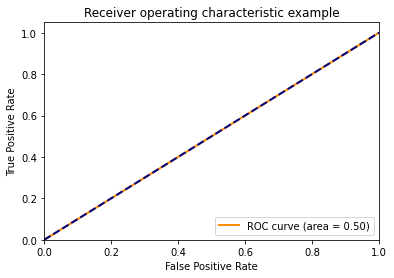

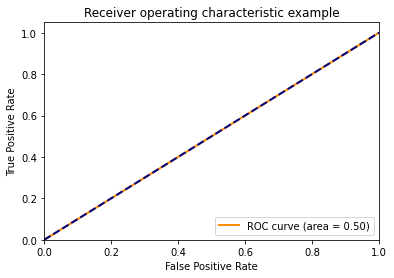

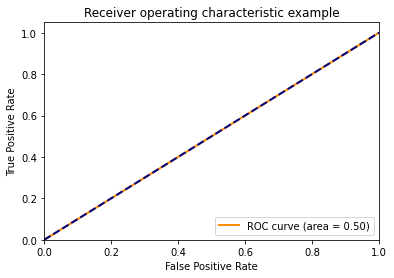

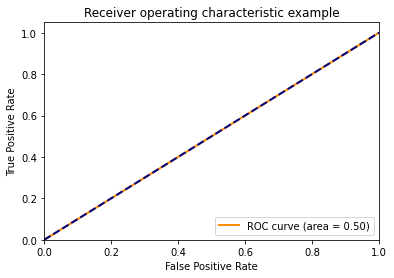

In [71]:
for j in range(J):
    pos_probs=Test[1][j]
    y_score=np.hstack(pos_probs)
    X_=Train[0][j]
    y_test=np.hstack(X_true)
    fpr, tpr, thresholds = roc_curve(y_test, y_score,pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

In [72]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])